In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn import metrics, preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sb
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [24]:
df_train = pd.read_csv("space_X_train.csv")

df_train.drop("Unnamed: 0", axis=1, inplace=True)

display(df_train.head(10))

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,target
0,0.474335,0.881640,-2.050543,-1.251935,-1.035151,-1.934367,4
1,-1.034675,1.741801,-1.660629,-1.555989,-0.337553,-2.473838,0
2,-0.563221,-0.688381,-0.318415,-1.845172,0.352366,-0.912928,1
3,-1.268179,2.770688,1.054193,2.830389,0.395093,0.677715,3
4,-1.216380,-0.391267,-2.898931,-0.913074,-2.171857,-2.367490,0
5,-0.318657,1.494771,1.016929,-0.406147,1.404118,-0.079592,2
6,-0.446664,-1.756617,-3.667949,-4.190566,-1.791285,-3.612232,1
7,-1.029892,2.621811,-1.323657,-1.355265,0.075202,-2.446302,0
8,1.493962,0.308105,-0.496445,-1.412684,0.210068,-0.607648,4
9,-0.226935,2.793953,-2.351688,2.074944,-2.227525,-1.475209,0


,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,target
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,-0.204656,0.199249,-0.378140,-0.206425,-0.186419,-0.433229,1.980476
std,1.543613,1.614024,1.450548,1.442225,1.501573,1.188791,1.410537
min,-6.683655,-5.383371,-6.147055,-5.653594,-5.912521,-4.433189,0.000000
25%,-1.171340,-0.877386,-1.365990,-1.259403,-1.211685,-1.131944,1.000000
50%,-0.443868,0.320507,-0.439745,-0.176504,-0.195751,-0.406754,2.000000
75%,0.890023,1.321430,0.662898,0.866879,0.851843,0.348593,3.000000
max,4.565547,6.700133,4.157518,4.371912,5.068783,4.016324,4.000000


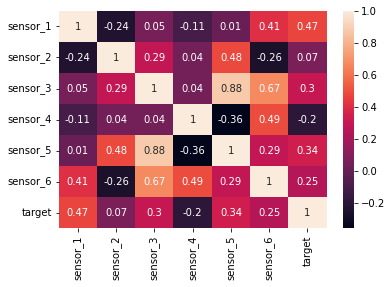

In [25]:
display(df_train.describe())

matrix = df_train.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

In [26]:
(rows, columns) = df_train.shape
X = df_train.iloc[:, 0:(columns - 1)]
y = df_train.iloc[:, (columns-1)]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=9949)

class_names = ["0", "1", "2", "3", "4"]

In [27]:
def entrena_y_evalua(X_train, X_test, y_train, y_test, sistema):
    if sistema == "KNeighborsClassifier":
        sys = KNeighborsClassifier()
    elif sistema == "GaussianNB":
        sys = GaussianNB()
    elif sistema == "DecisionTreeClassifier":
        sys = DecisionTreeClassifier(random_state=1234)
    elif sistema == "RandomForestClassifier":
        sys = RandomForestClassifier(random_state=1234, n_jobs=-1)
    elif sistema == "AdaBoostClassifier":
        sys = AdaBoostClassifier(random_state=1234)
    elif sistema == "SVC":
        sys = SVC(max_iter=100000)
    elif sistema == "LinearSVC":
        sys = LinearSVC(max_iter=1000000)
    elif sistema == "LogisticRegression":
        sys = LogisticRegression(max_iter=100000)
    elif sistema == "ovo(rl)":
        sys = OneVsOneClassifier(LogisticRegression(max_iter=100000))
    elif sistema == "ovo(svc)":
        sys = OneVsOneClassifier(SVC(max_iter=1000000))
    elif sistema == "ovr(rl)":
        sys = OneVsRestClassifier(LogisticRegression(max_iter=1000000))
    elif sistema == "ovr(svc)":
        sys = OneVsRestClassifier(SVC(max_iter=1000000))
    else:
        print("Sistema no reconocido")
        exit()

    model = sys.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = metrics.confusion_matrix(y_test, y_pred)

    resultados = metrics.classification_report(
        y_test, y_pred, output_dict=True)

    return [
        resultados["accuracy"],
        resultados["macro avg"]["precision"],
        resultados["macro avg"]["recall"],
        resultados["macro avg"]["f1-score"],
    ]

    # return [
    #     resultados["accuracy"],
    #     resultados["weighted avg"]["precision"],
    #     resultados["weighted avg"]["recall"],
    #     resultados["weighted avg"]["f1-score"],
    # ]

In [28]:
sistemas = [
    "KNeighborsClassifier",
    "GaussianNB",
    "DecisionTreeClassifier",
    "RandomForestClassifier",
    "AdaBoostClassifier",
    "SVC",
    "LinearSVC",
    "LogisticRegression",
    "ovo(rl)",
    "ovo(svc)",
    "ovr(rl)",
    "ovr(svc)"
]

resultados = np.empty((len(sistemas), 4))
i = 0
for sistema in sistemas:
    resultados[i, :] = entrena_y_evalua(
        X_train, X_test, y_train, y_test, sistema)
    i += 1

In [29]:
df_resultados = pd.DataFrame(
    resultados, index=sistemas, columns=[
        "Accuracy", "Precision", "Recall", "F1-score"]
)
print(df_resultados)

                        Accuracy  Precision    Recall  F1-score
KNeighborsClassifier    0.761905   0.764503  0.761887  0.761459
GaussianNB              0.592857   0.594566  0.589460  0.578321
DecisionTreeClassifier  0.688095   0.692750  0.686595  0.688060
RandomForestClassifier  0.769048   0.774145  0.769618  0.770072
AdaBoostClassifier      0.583333   0.573703  0.580058  0.571555
SVC                     0.759524   0.762837  0.758043  0.758528
LinearSVC               0.500000   0.446396  0.495856  0.439937
LogisticRegression      0.509524   0.483415  0.505660  0.484458
ovo(rl)                 0.530952   0.508266  0.526156  0.511366
ovo(svc)                0.757143   0.760446  0.755718  0.756148
ovr(rl)                 0.516667   0.481821  0.512565  0.478641
ovr(svc)                0.742857   0.745552  0.742032  0.742779
